## Import Libraries

In [48]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

# from plotly.offline import iplot
# import plotly as py
# import plotly.tools as tls

import pickle

## 1. Data Preparation and Data Exploration

In [49]:
# Read data in the excel file
df = pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,111,170,0,2,150,0,0.3,1,0,3,0
1,48,0,3,118,285,0,0,145,0,0.3,2,1,3,1
2,47,1,4,115,312,0,0,187,0,1.3,2,0,3,1
3,51,1,3,96,237,0,0,156,1,0.5,1,1,3,1
4,51,1,3,99,227,0,0,155,1,0.2,1,1,3,1


In [50]:
df.shape

(21060, 14)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       21060 non-null  int64  
 1   sex       21060 non-null  int64  
 2   cp        21060 non-null  int64  
 3   trestbps  21060 non-null  int64  
 4   chol      21060 non-null  int64  
 5   fbs       21060 non-null  int64  
 6   restecg   21060 non-null  int64  
 7   thalach   21060 non-null  int64  
 8   exang     21060 non-null  int64  
 9   oldpeak   21060 non-null  float64
 10  slope     21060 non-null  int64  
 11  ca        21060 non-null  int64  
 12  thal      21060 non-null  int64  
 13  target    21060 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.2 MB


In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000,21060.00000,21060.000000,21060.000000,21060.000000,21060.000000,21060.000000
mean,53.037654,0.677778,3.174074,131.139601,244.280342,0.148148,1.022222,149.446011,0.32963,1.171619,1.585185,0.670370,3.464245,0.547863
std,9.745630,0.467339,0.948351,19.007377,42.833553,0.355255,0.996065,23.990766,0.47009,1.112976,0.613266,0.942169,1.228840,0.497716
min,28.000000,0.000000,1.000000,94.000000,125.000000,0.000000,0.000000,70.000000,0.00000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,116.000000,213.000000,0.000000,0.000000,135.000000,0.00000,0.300000,1.000000,0.000000,3.000000,0.000000
50%,53.000000,1.000000,3.000000,129.000000,240.000000,0.000000,2.000000,153.000000,0.00000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,4.000000,145.000000,283.000000,0.000000,2.000000,167.000000,1.00000,1.700000,2.000000,1.000000,3.000000,1.000000
max,78.000000,1.000000,4.000000,179.000000,319.000000,1.000000,2.000000,203.000000,1.00000,6.200000,3.000000,3.000000,7.000000,1.000000


In [53]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df['target'].value_counts()

1    11538
0     9522
Name: target, dtype: int64

In [55]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    54.786325
0    45.213675
Name: target, dtype: float64

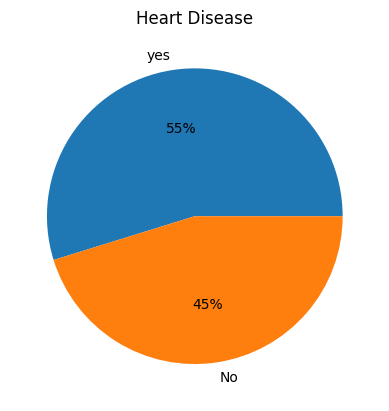

In [56]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


**Note:**

As you can see, the dataset contains 14 columns 5 of them are numerical values and 9 of them are categorical values. We can see also there are no missing values in this dataset. As for the data balancing, the data is relatively balanced, 56% of the persons in the dataset have heart disease.

### Attributes Correlation

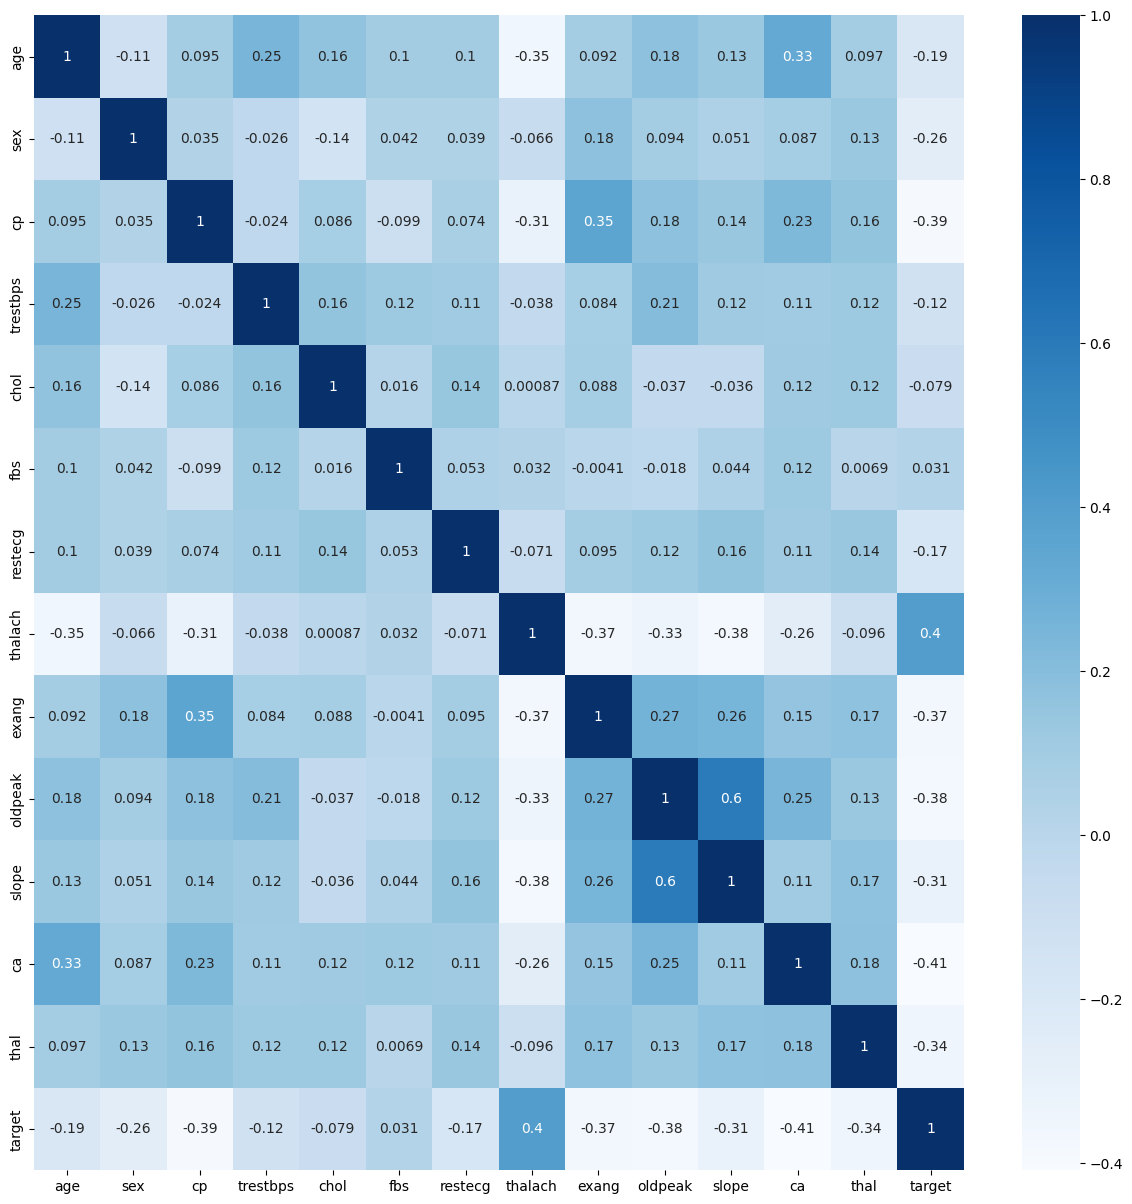

In [57]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

**Note:**

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly.  We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

* The number of major vessels (0-3) colored by flourosopy (ca) and the age.
* ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
* The chest pain type (cp), exercise induced angina (exang).
* maximum heart rate (thalch) and the age.



Next, I will explore each attribute and then explore the found correlations.

### Age Exploration


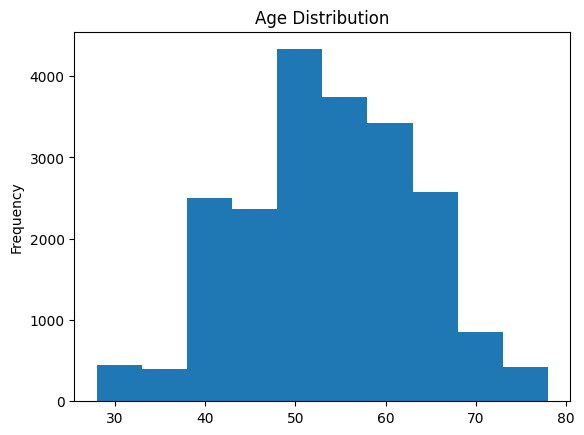

In [58]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [59]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  28
Max age:  78
Average age:  53.037654320987656


C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\2702676824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 1]['age'], label='Do not have heart disease')
C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\2702676824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['

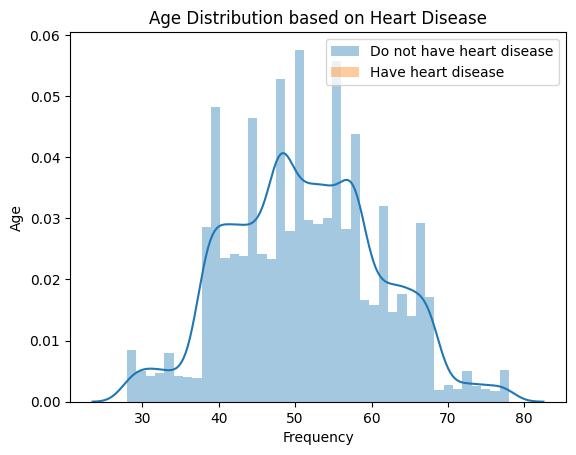

In [60]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(df[df['target'] == 2]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [61]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  28
Max age of people who do not have heart disease:  78
Average age of people who do not have heart disease:  55.10270951480781


In [62]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', df[df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  28
Max age of people who have heart disease:  78
Average age of people who have heart disease:  51.333420003466806


**Note:**

From the data, I can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  



### Gender Exploration

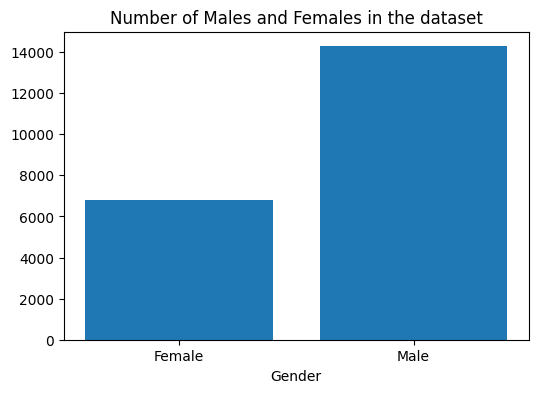

In [63]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

### Chest Pain Type Exploration

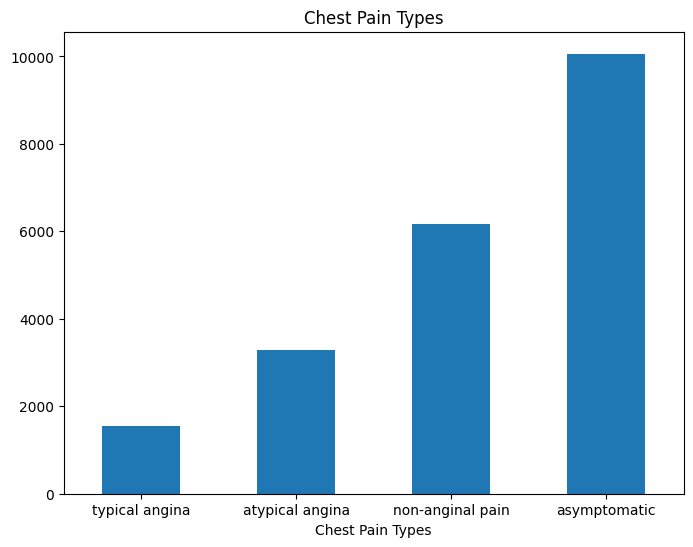

In [64]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

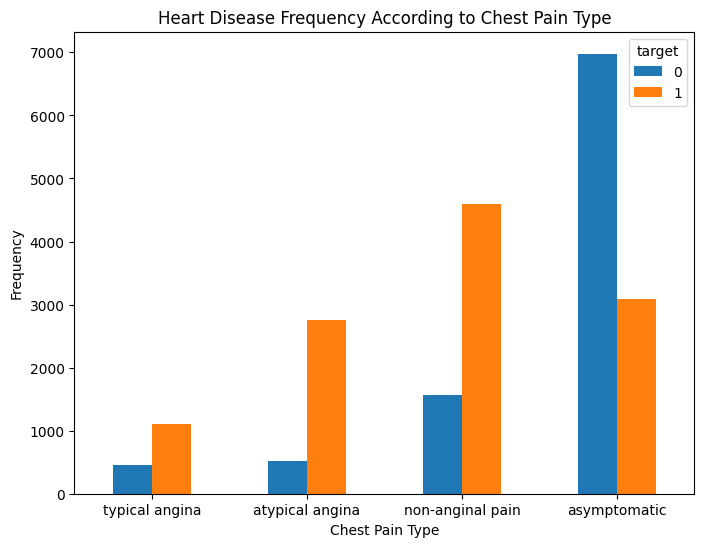

In [65]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

We can see that most of the people with heart disease have asymptomatic chest pain.



### Blood Pressure Exploration 

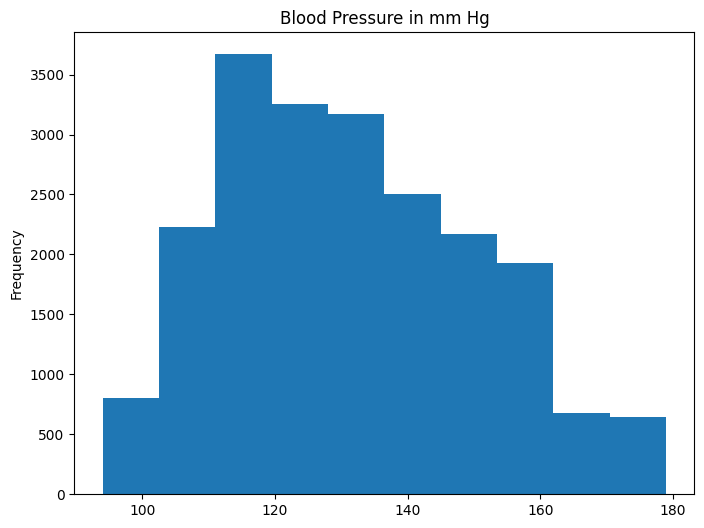

In [66]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\3232249131.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['target'] == 1]['trestbps'], label='Do not have heart disease', ax = axis1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\3232249131.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



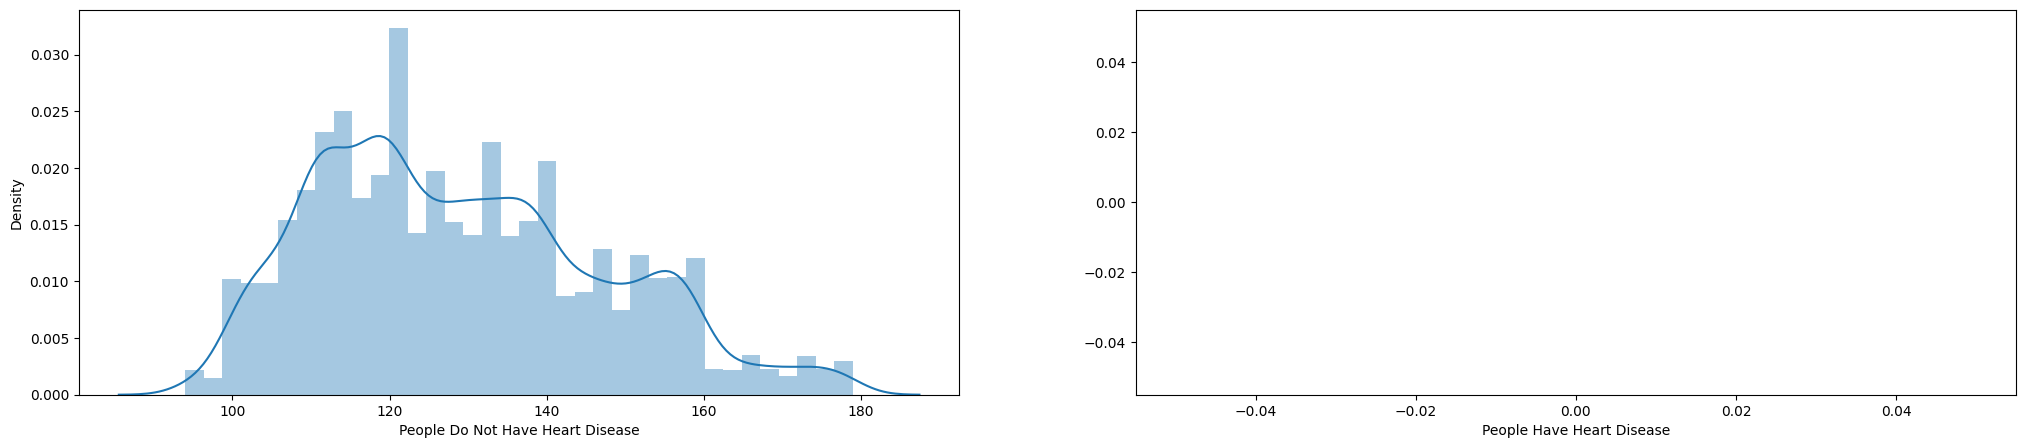

In [67]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [68]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  179
Average blood pressure of people who do not have heart disease:  133.72064692291536


In [69]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  179
Average blood pressure of people who have heart disease:  129.0095337146819


### Cholestoral Exploration 

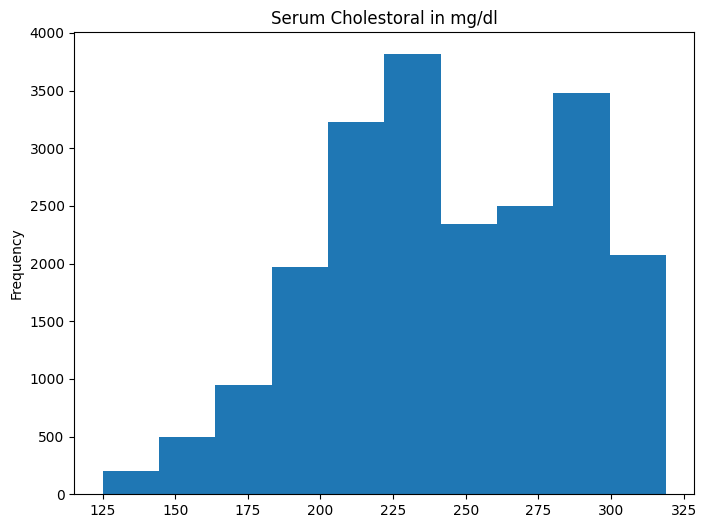

In [70]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\650513092.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['target'] == 1]['chol'], label='Do not have heart disease', ax = axis1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\650513092.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax =

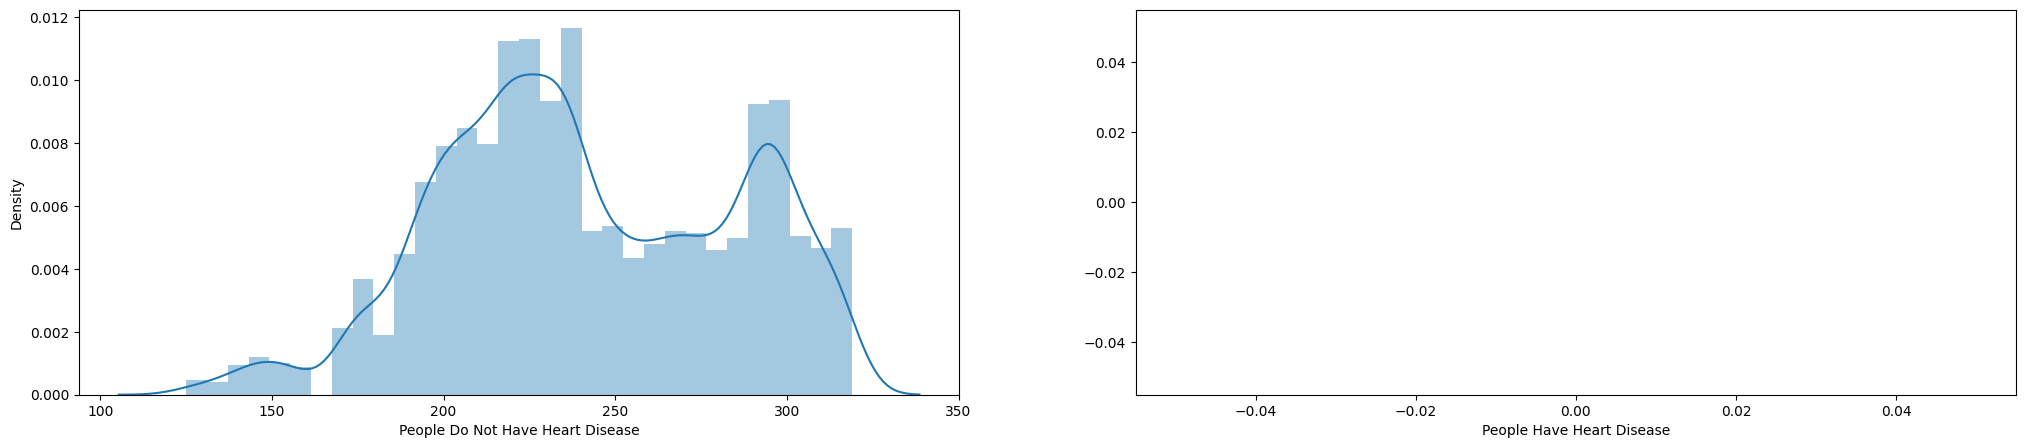

In [71]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [72]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  140
Max cholestoral of people who do not have heart disease:  319
Average cholestoral of people who do not have heart disease:  247.99422390254148


In [73]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', df[df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  125
Max cholestoral of people who have heart disease:  319
Average cholestorale of people who have heart disease:  241.21537528167792


### Fasting Blood Sugar  Exploration 

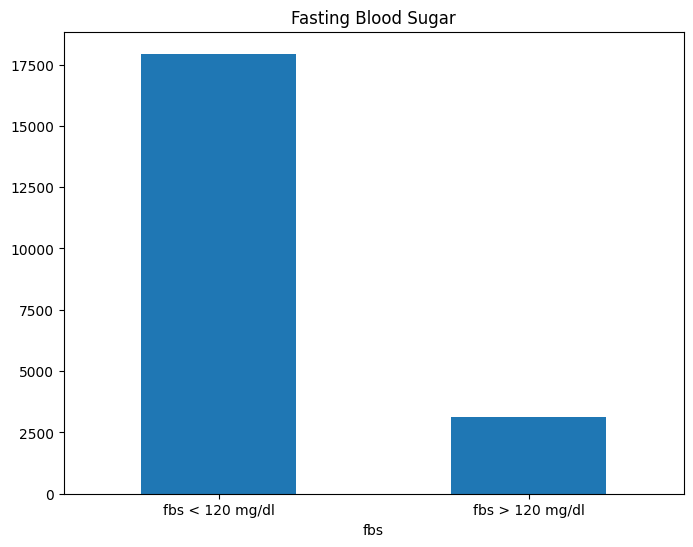

In [74]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

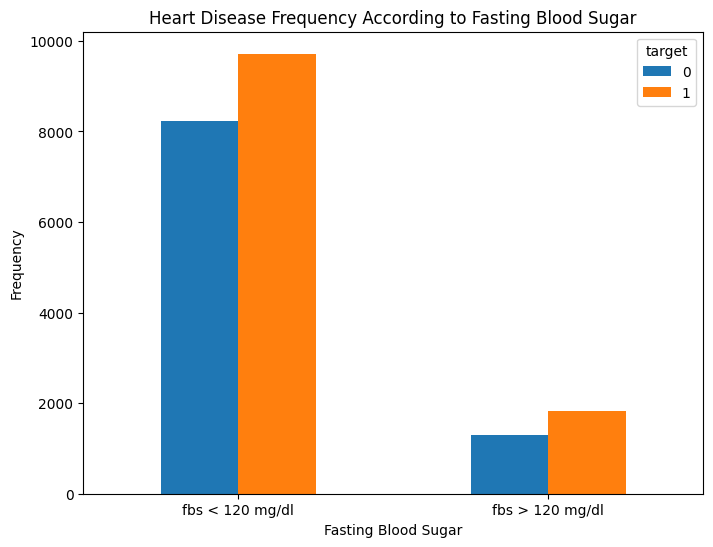

In [75]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

###  Electrocardiographic Results Exploration

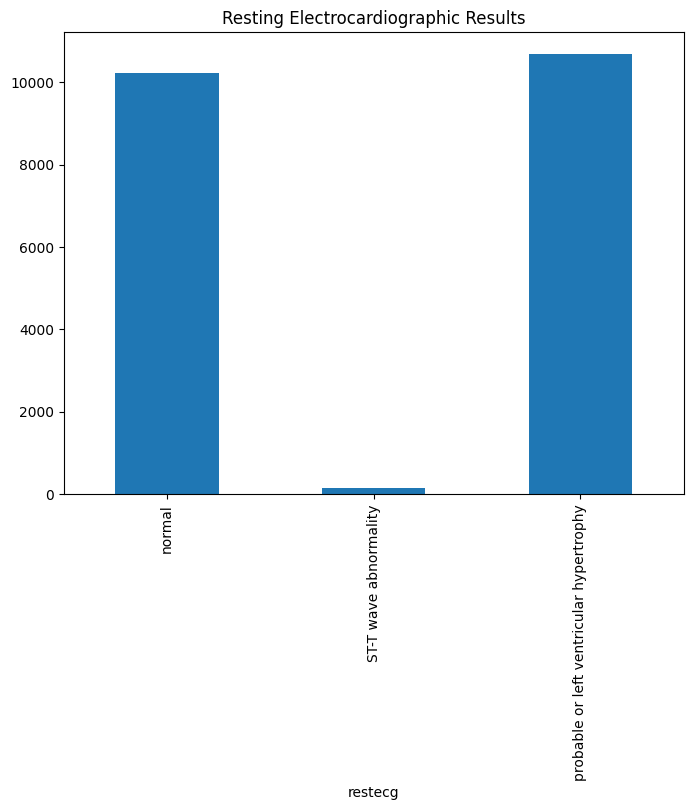

In [76]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

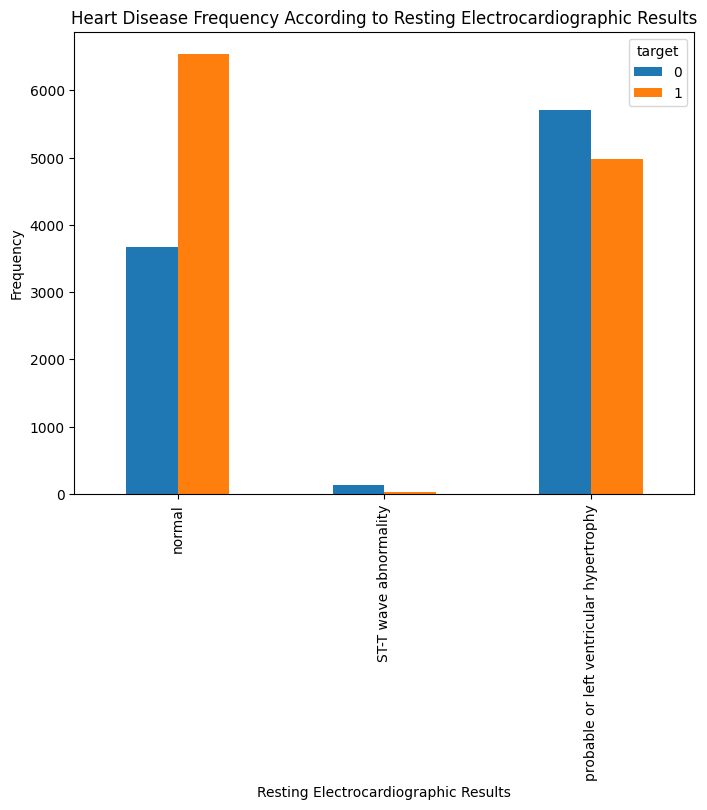

In [77]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

**Note:**

Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

### Maximum Heart Rate Exploration

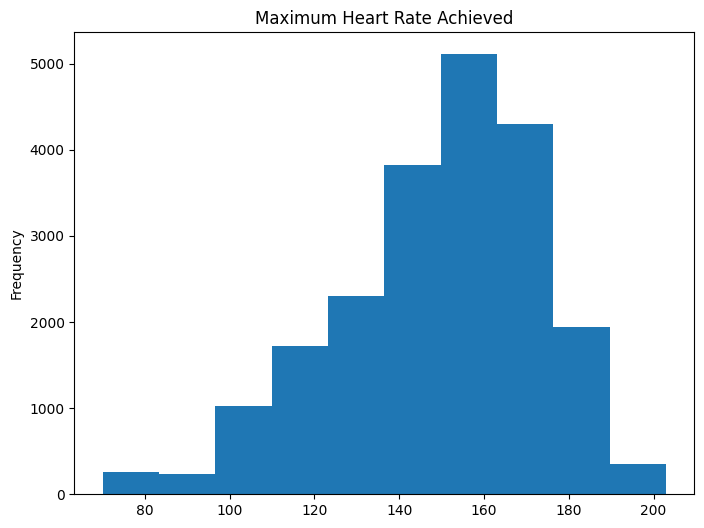

In [78]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\4143169956.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['target'] == 1]['thalach'], label='Do not have heart disease', ax = axis1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\4143169956.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

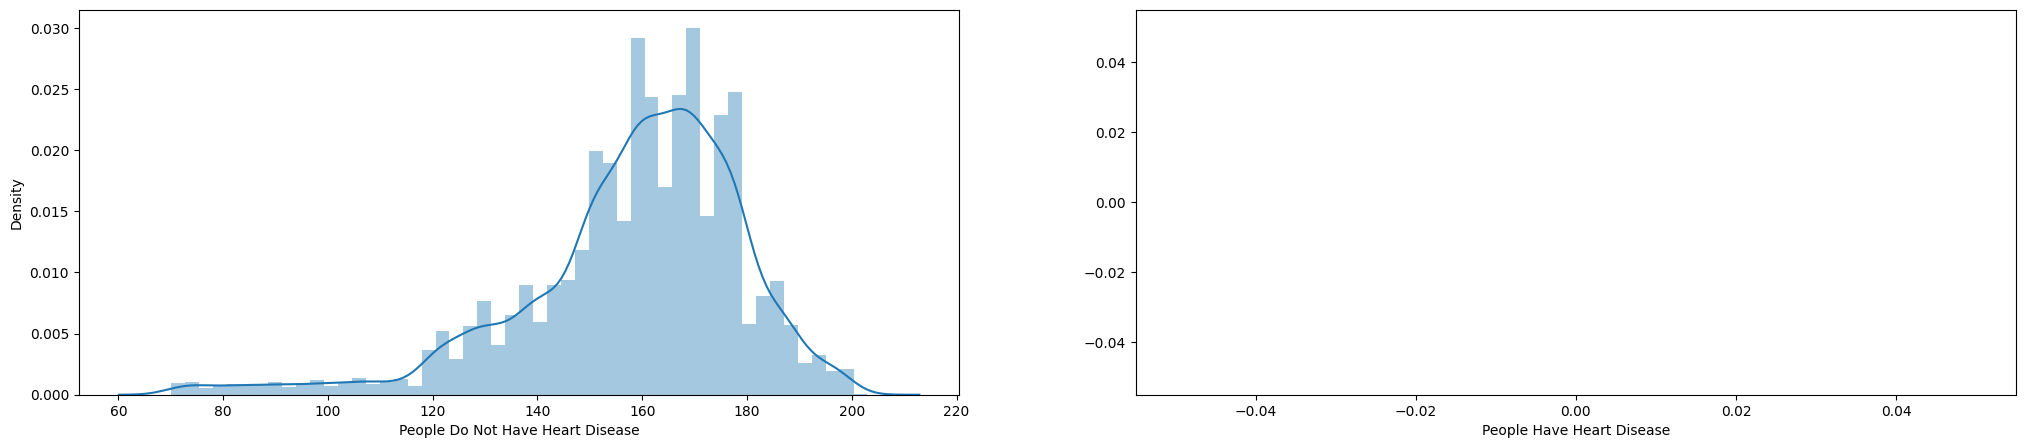

In [79]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [80]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(df[df['target'] == 0]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(df[df['target'] == 0]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', df[df['target'] == 0]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  70
Max resting blood pressure of people who do not have heart disease:  199
Average resting blood pressure of people who do not have heart disease:  138.8731358958202


In [81]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(df[df['target'] == 1]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(df[df['target'] == 1]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', df[df['target'] == 1]['thalach'].mean())

Min maximum heart rate  of people who have heart disease:  70
Max maximum heart rate people who have heart disease:  203
Average maximum heart rate of people who have heart disease:  158.1715201941411


**Note:**

The people who have heigh heart rate greater than 150 are more likely to have heart disease.

### Exercise Induced Angina Exploration

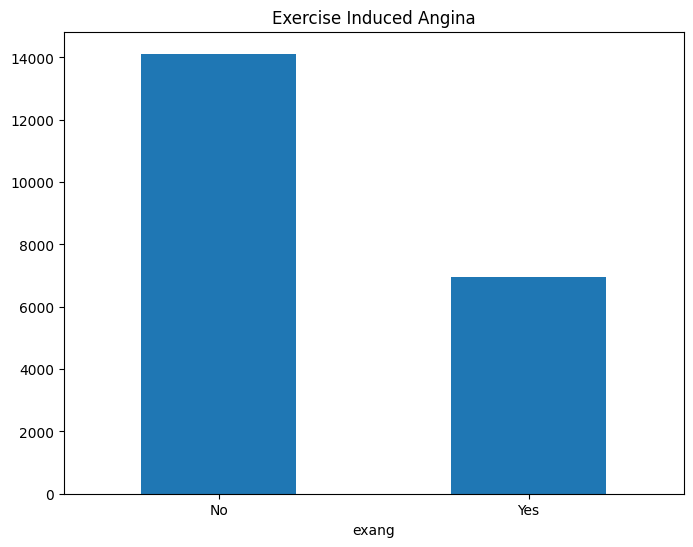

In [82]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

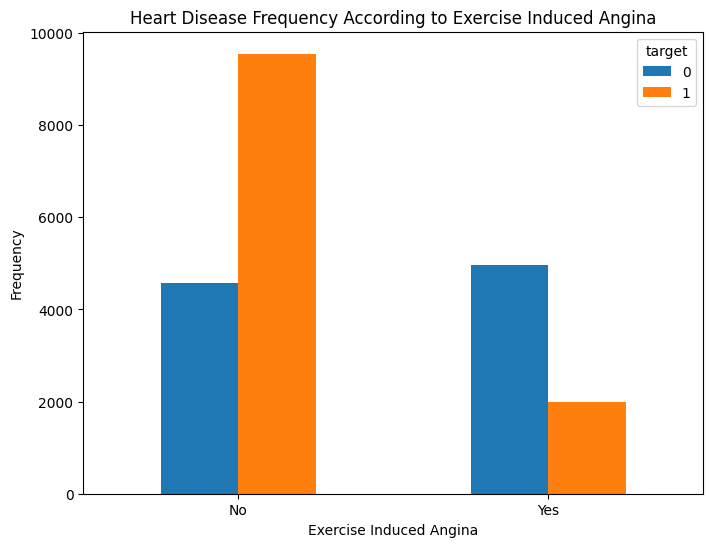

In [83]:
# Display exercise induced angina based on the target
pd.crosstab(df.exang,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

### ST depression Exploration

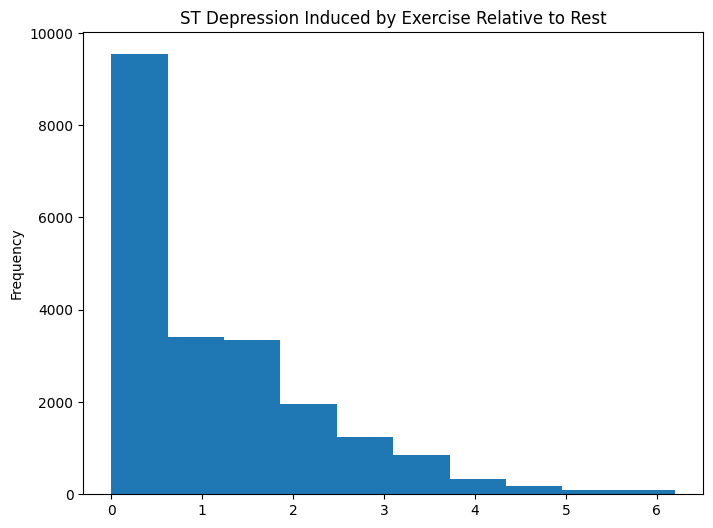

In [84]:
# Display ST depression induced by exercise relative to rest distribution
df['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\3084050048.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label='Do not have heart disease', ax = axis1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20244\3084050048.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

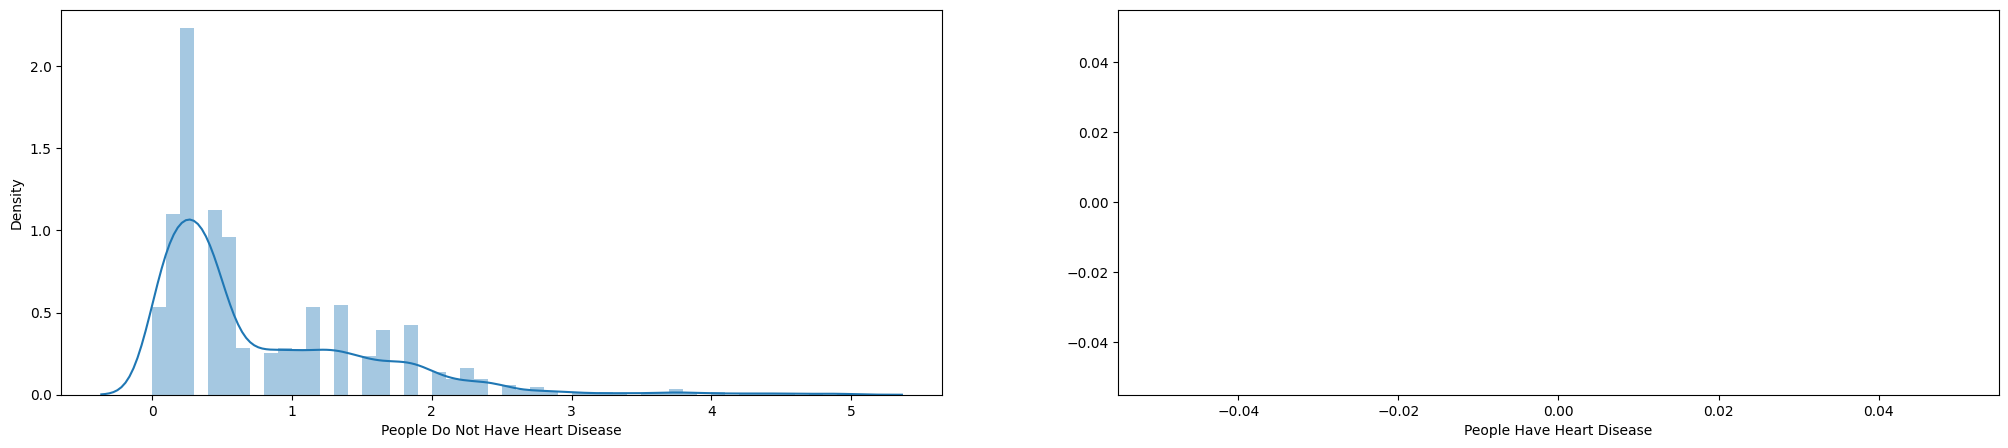

In [85]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [86]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(df[df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', df[df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.6367569838269271


In [87]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(df[df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', df[df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  5.0
Average ST depression of people not have heart disease:  0.7877535101404056


**Note:**

The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5. 

### Slope Exploration

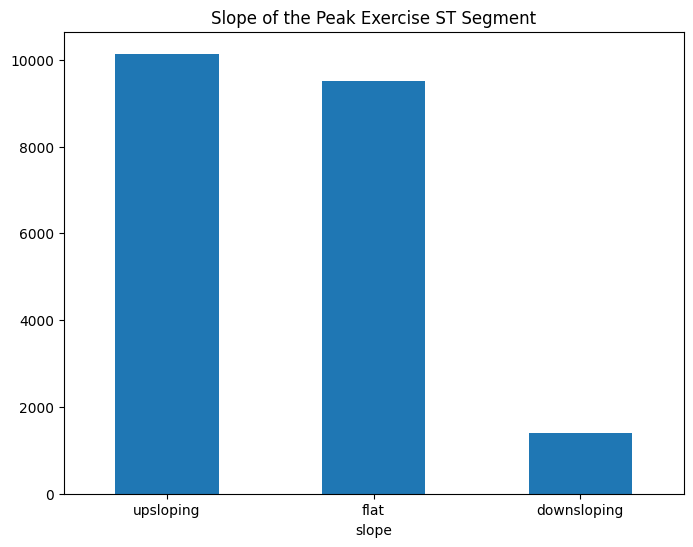

In [88]:
# Display slope of the peak exercise ST segment in bar chart
df.groupby(df['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

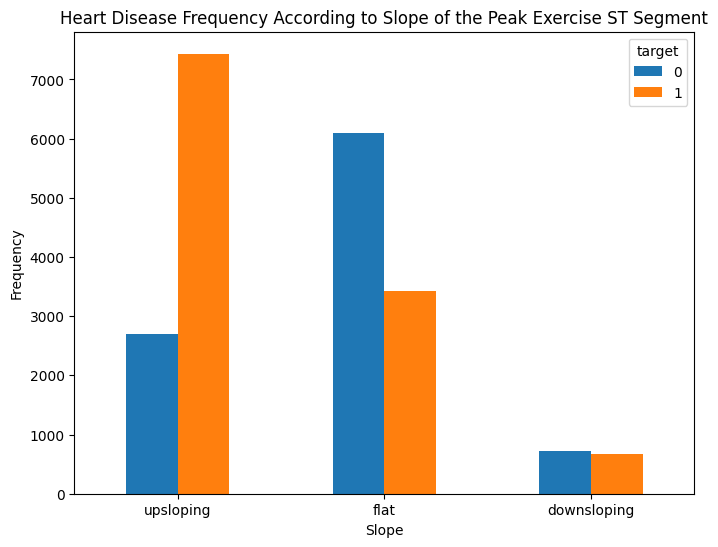

In [89]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.slope,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

### Major Vessels Exploration

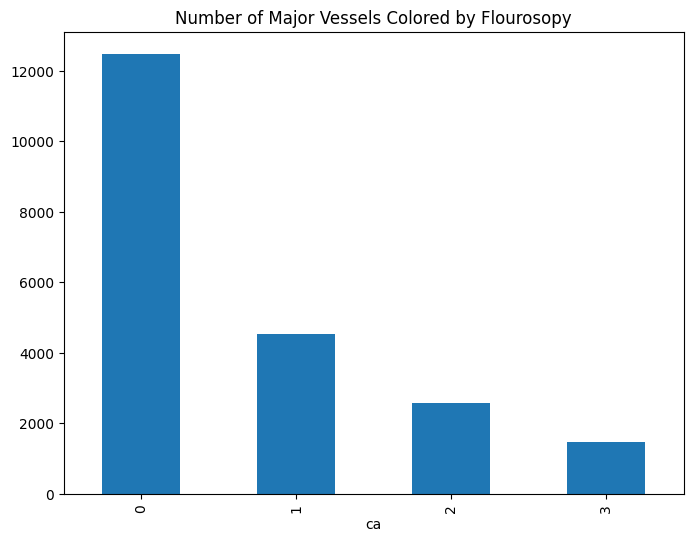

In [90]:
# Display number of major vessels in bar chart
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

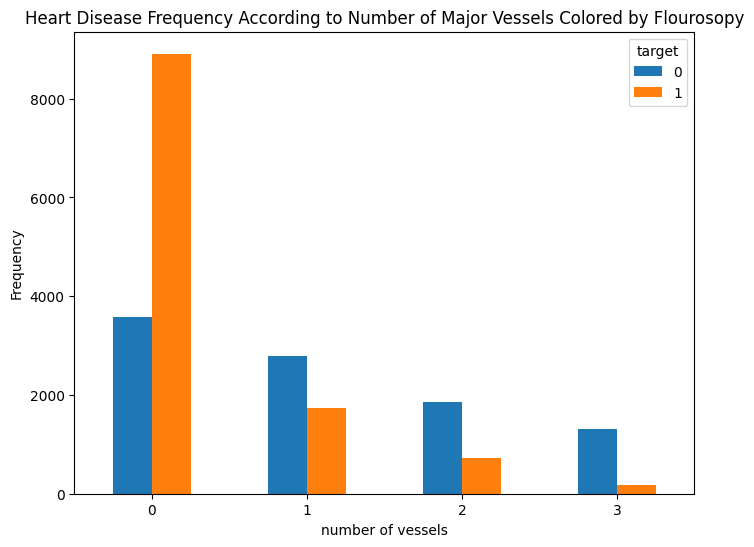

In [91]:
# Display number of vessels based on the target
pd.crosstab(df.ca,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Thalassemia Exploration

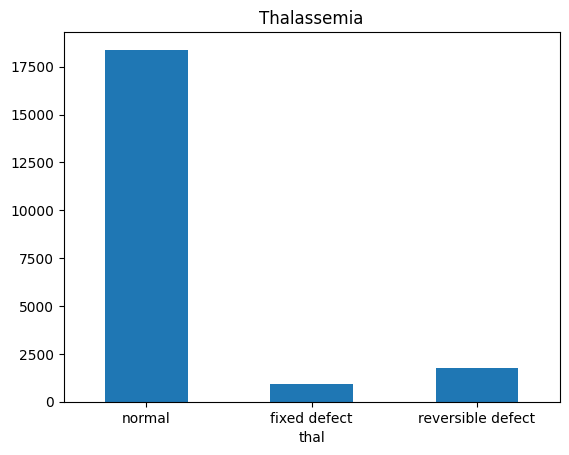

In [92]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

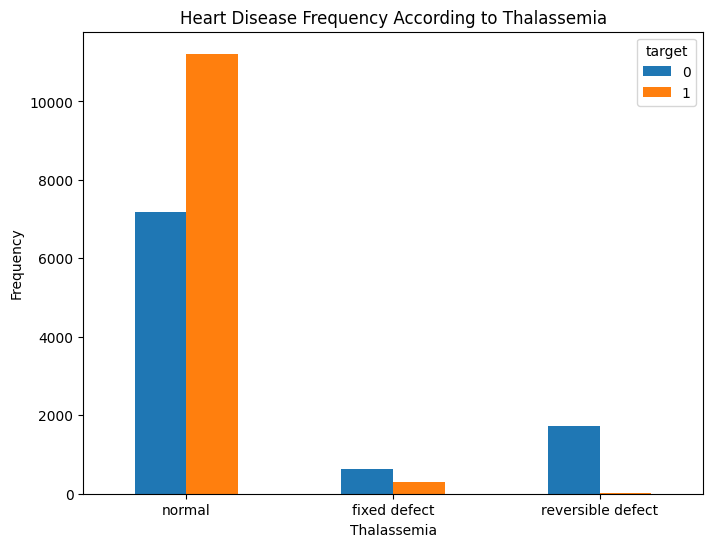

In [93]:
pd.crosstab(df.thal,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with reversible defect are likely to have heart disease.

### The correlation between heart disease, cp and exang

In [94]:
# g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 1], kind = "count")
# plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
# g.fig.suptitle('People without Heart Disease', y = 1.1)
# plt.show()

In [95]:
# g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 1], kind = "count")
# plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
# g.fig.suptitle('People with Heart Disease', y = 1.1)
# plt.show()

**Note:**

The people who have exercise induced angina, they usually suffer from asymptomatic chest pain. Moreover, the people who do not have exercise induced angina, they usually suffer from asymptomatic chest pain if they have heart disease.


### The correlation between oldpeak, slope and target

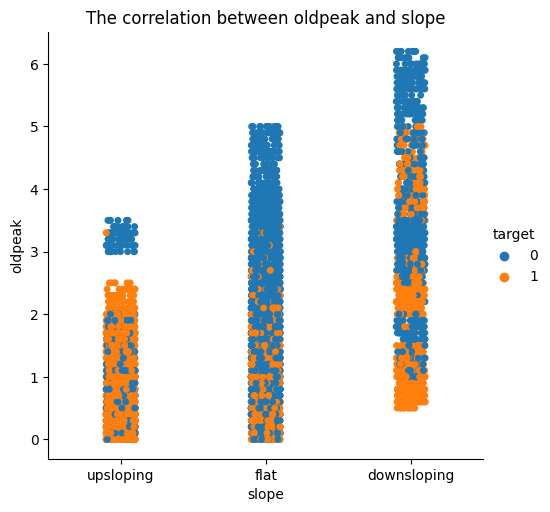

In [96]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = df)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

**Note:**

Flat slope and downsloping have higher values of ST depression.

### The correlation between ca and age

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

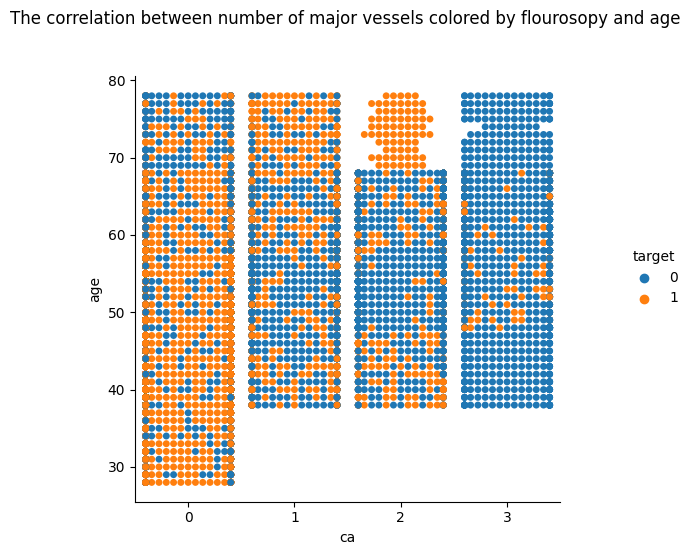

In [97]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = df, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

**Note:**

The older people are more likely to have vessels colored by flourosopy.

### The correlation between age and thalach

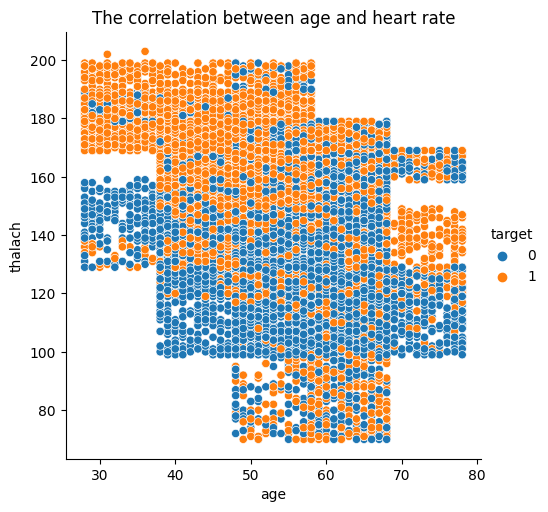

In [98]:
sns.relplot(x = 'age', y = 'thalach', data = df, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

**Note:**

The older the person, the lower the heart rate. Also, the people with lower heart rate are likely to have heart disease. 

## 3. Modeling

### 3.1. Prepare Data for Machine Learning

In [99]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [100]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

Here, I will use the below machine learning algorithms then I will select the best one based on its classification report.

* Support Vector Machine 
* Random Forest
* Ada Boost
* Gradient Boosting



### 3.2. Train and Evaluate Models

In [101]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [102]:
# Initialize the models

sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
knn = KNeighborsClassifier(n_neighbors=3)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, knn, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

In [103]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1906
           1       0.74      0.79      0.76      2306

    accuracy                           0.73      4212
   macro avg       0.73      0.73      0.73      4212
weighted avg       0.73      0.73      0.73      4212


confusion_matrix :
[[1255  651]
 [ 479 1827]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1906
           1       0.98      0.96      0.97      2306

    accuracy                           0.97      4212
   macro avg       0.97      0.97      0.97      4212
weighted avg       0.97      0.97      0.97      4212


confusion_matrix :
[[1862   44]
 [  83 2223]]

-----

KNeighborsClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1906
    

#### Selecting the Classifier
From the results, the best classifier is GradientBoostingClassifier. 



### 3.3. The Important Features

Feature: age, Score: 0.02797
Feature: sex, Score: 0.04468
Feature: cp, Score: 0.25822
Feature: trestbps, Score: 0.03770
Feature: chol, Score: 0.02644
Feature: fbs, Score: 0.01522
Feature: restecg, Score: 0.01096
Feature: thalach, Score: 0.15788
Feature: exang, Score: 0.01983
Feature: oldpeak, Score: 0.11932
Feature: slope, Score: 0.04842
Feature: ca, Score: 0.14486
Feature: thal, Score: 0.08850


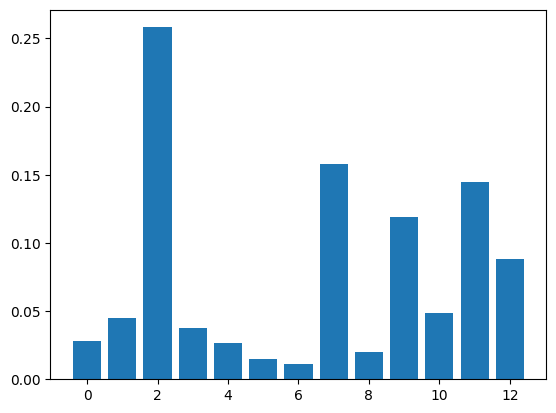

In [104]:
# get importance
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### 3.4. Save Model

 Finally, I will save the GradientBoostingClassifier model to use it later. 

In [105]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(knn, file)

## 4. Summary

As a summary, in this note book, I used a heart disease dataset to build a classification model. I started with data exploration, then data preperation. After that, I built five models for heart disease classification. Finally, I selected the best model and save it to use it latter. 
    